## **Experiments No. 8**
HR_comma_sep.csv

PART B  
Logistic  Regression

In [1]:
print("\n\nExperiment No. 8\n smita shinde \n UID = 20BCS4643 \n Class BIT_B")




Experiment No. 8
 smita shinde 
 UID = 20BCS4643 
 Class BIT_B


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(14999, 10)

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
df.left.unique()

array([1, 0], dtype=int64)

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
left = len(df[df.left == 1])
left

3571

In [10]:
retained = len(df[df.left == 0])
retained

11428

In [11]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [12]:
# above table shows that those who left that has 44% satisfaction and they are worked more hours 207 but they are not promoted in last 5 years so that's why they are leaving the job

<AxesSubplot:xlabel='salary'>

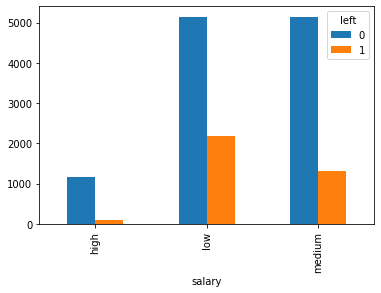

In [13]:
pd.crosstab(df.salary, df.left).plot(kind='bar')


In [14]:
# Here above results shows that employee with high salaries are likely to to not leave the company

In [15]:
dependentDf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
dependentDf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [16]:
salary_dummies = pd.get_dummies(dependentDf.salary, prefix='salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [17]:
df_with_dummies = pd.concat([dependentDf,salary_dummies], axis='columns')

In [18]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [19]:
df_with_dummies.drop('salary', axis='columns', inplace=True)


In [20]:
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [21]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [22]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression


In [26]:
reg = LogisticRegression()


In [27]:
reg.fit(X_train, y_train)


LogisticRegression()

In [28]:
reg.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
reg.score(X_test, y_test)


0.7763333333333333